In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
aapl_put_df = pd.read_csv('C:\\Users\\bkim5\\EVERYTHING CODING\\PROJECT\\Options project\\2. Data Wrangling\\aapl_put_df.csv')
aapl_put_df

,QUOTE_DATE,EXPIRE_DATE,LAST_PRICE,DTE,STRIKE,P_ASK,P_BID,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_VOLUME,P_IV,PROB_ITM
0,2017-01-03,2017-01-06,116.14,3.00,70.0,0.01,0.00,-0.00095,0.00014,0.00038,-0.00405,0.0,1.58978,0.095
1,2017-01-03,2017-06-16,116.14,163.96,55.0,0.06,0.01,-0.00272,0.00022,0.00677,-0.00090,0.0,0.41986,0.272
2,2017-01-03,2017-06-16,116.14,163.96,60.0,0.06,0.05,-0.00534,0.00047,0.01165,-0.00175,200.0,0.40007,0.534
3,2017-01-03,2017-06-16,116.14,163.96,65.0,0.10,0.07,-0.00775,0.00070,0.01646,-0.00229,0.0,0.37233,0.775
4,2017-01-03,2017-06-16,116.14,163.96,70.0,0.16,0.12,-0.01377,0.00122,0.02675,-0.00258,0.0,0.35499,1.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859908,2020-12-31,2021-01-29,132.60,29.00,190.0,57.50,56.90,-1.00000,0.00000,0.40359,0.00000,0.0,0.00000,100.000
859909,2020-12-31,2021-01-29,132.60,29.00,185.0,52.56,51.95,-1.00000,0.00000,0.40395,0.00000,0.0,0.00000,100.000
859910,2020-12-31,2021-01-29,132.60,29.00,180.0,47.60,47.00,-1.00000,0.00000,0.40429,0.00000,0.0,0.00000,100.000
859911,2020-12-31,2021-02-05,132.60,36.00,75.0,0.17,0.07,-0.00890,0.00071,0.01041,-0.01168,0.0,0.80270,0.890


# Relationship between each greek values and strike price

Compare different expiration date of each option and expire date can be chosen at random within its own dte dataframe

In [12]:
aapl_put_df.loc[(aapl_put_df['DTE'] == 3)]

,QUOTE_DATE,EXPIRE_DATE,LAST_PRICE,DTE,STRIKE,P_ASK,P_BID,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_VOLUME,P_IV,PROB_ITM
0,2017-01-03,2017-01-06,116.14,3.0,70.0,0.01,0.00,-0.00095,0.00014,0.00038,-0.00405,0.0,1.58978,0.095
374,2017-01-03,2017-01-06,116.14,3.0,112.0,0.08,0.05,-0.05413,0.04265,0.01376,-0.03221,0.0,0.21260,5.413
375,2017-01-03,2017-01-06,116.14,3.0,113.0,0.10,0.09,-0.08909,0.06973,0.01964,-0.04434,0.0,0.18950,8.909
376,2017-01-03,2017-01-06,116.14,3.0,114.0,0.17,0.15,-0.15391,0.11636,0.02849,-0.06332,0.0,0.16739,15.391
377,2017-01-03,2017-01-06,116.14,3.0,115.0,0.38,0.36,-0.29447,0.17497,0.04166,-0.09600,0.0,0.16181,29.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856369,2020-12-28,2020-12-31,136.73,3.0,117.0,0.02,0.01,-0.00540,0.00183,0.00182,-0.01177,210.0,0.59265,0.540
856370,2020-12-28,2020-12-31,136.73,3.0,118.0,0.02,0.02,-0.00557,0.00210,0.00238,-0.01137,373.0,0.56473,0.557
856371,2020-12-28,2020-12-31,136.73,3.0,119.0,0.02,0.00,-0.00626,0.00221,0.00261,-0.01133,270.0,0.53472,0.626
856372,2020-12-28,2020-12-31,136.73,3.0,120.0,0.02,0.01,-0.00664,0.00247,0.00209,-0.01118,0.0,0.50423,0.664


In [13]:
early_dte = aapl_put_df.loc[(aapl_put_df['DTE'] == 3) & (aapl_put_df['EXPIRE_DATE'] == '2017-01-06')]
early_dte = early_dte.sort_values(by=['STRIKE'])
early_dte = early_dte.reset_index(drop=True)

mid_dte = aapl_put_df.loc[(aapl_put_df['DTE'] == 30) & (aapl_put_df['EXPIRE_DATE'] == '2017-02-03')]
mid_dte = mid_dte.sort_values(by=['STRIKE'])
mid_dte = mid_dte.reset_index(drop=True)

late_dte = aapl_put_df.loc[(aapl_put_df['DTE'] == 350) & (aapl_put_df['EXPIRE_DATE'] == '2018-01-19')]
late_dte = late_dte.sort_values(by=['STRIKE'])
late_dte = late_dte.reset_index(drop=True)

# EARLY DTE

In [14]:
early_strike = early_dte['STRIKE'].tolist()
early_pdelta = early_dte['P_DELTA'].tolist()
early_ptheta = early_dte['P_THETA'].tolist()
early_pvega = early_dte['P_VEGA'].tolist()
early_pgamma = early_dte['P_GAMMA'].tolist()
early_last_price = early_dte['LAST_PRICE'][0]

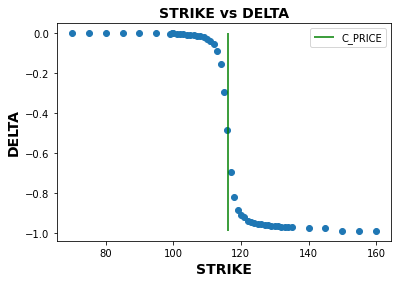

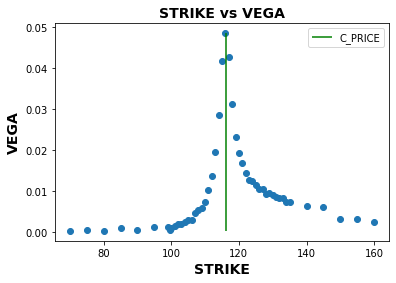

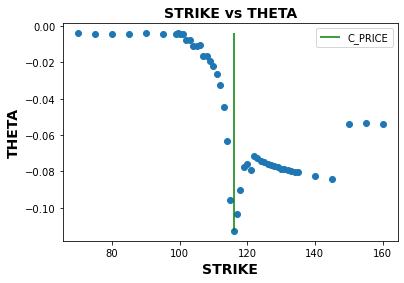

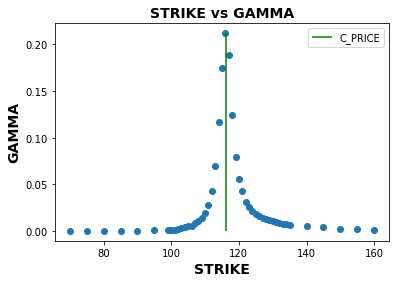

In [15]:
plt.scatter(early_strike, early_pdelta)
plt.vlines(early_last_price,min(early_pdelta), max(early_pdelta), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('DELTA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs DELTA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(early_strike, early_pvega)
plt.vlines(early_last_price,min(early_pvega), max(early_pvega), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('VEGA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs VEGA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(early_strike, early_ptheta)
plt.vlines(early_last_price,min(early_ptheta), max(early_ptheta), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('THETA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs THETA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(early_strike, early_pgamma)
plt.vlines(early_last_price,min(early_pgamma), max(early_pgamma), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('GAMMA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs GAMMA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

When trading early dte options, every greek values are extremely volatile around the current stock price and any small movement will make a big impact.

# MID DTE

In [16]:
mid_strike = mid_dte['STRIKE'].tolist()
mid_pdelta = mid_dte['P_DELTA'].tolist()
mid_ptheta = mid_dte['P_THETA'].tolist()
mid_pvega = mid_dte['P_VEGA'].tolist()
mid_pgamma = mid_dte['P_GAMMA'].tolist()
mid_last_price = mid_dte['LAST_PRICE'][0]

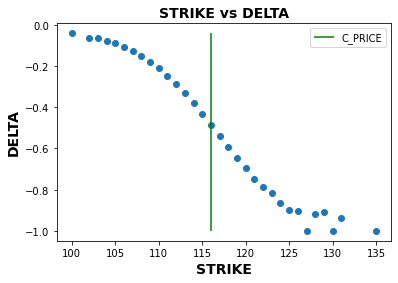

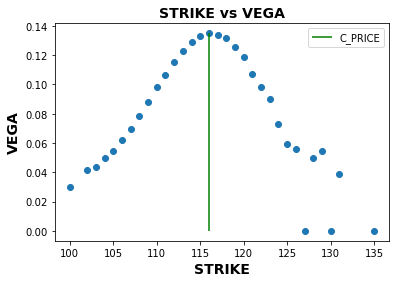

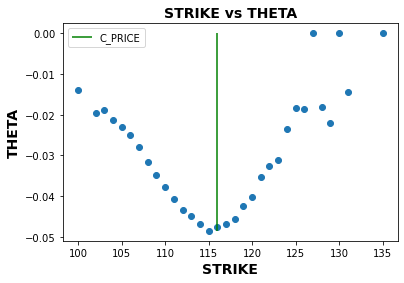

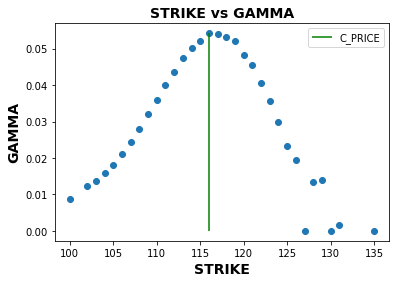

In [17]:
plt.scatter(mid_strike, mid_pdelta)
plt.vlines(mid_last_price,min(mid_pdelta), max(mid_pdelta), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('DELTA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs DELTA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(mid_strike, mid_pvega)
plt.vlines(mid_last_price,min(mid_pvega), max(mid_pvega), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('VEGA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs VEGA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(mid_strike, mid_ptheta)
plt.vlines(mid_last_price,min(mid_ptheta), max(mid_ptheta), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('THETA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs THETA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(mid_strike, mid_pgamma)
plt.vlines(mid_last_price,min(mid_pgamma), max(mid_pgamma), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('GAMMA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs GAMMA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

The movement of greek value has a steady flow and it is not as volatile as the early dte options.

# LATE DTE

In [18]:
late_strike = late_dte['STRIKE'].tolist()
late_pdelta = late_dte['P_DELTA'].tolist()
late_ptheta = late_dte['P_THETA'].tolist()
late_pvega = late_dte['P_VEGA'].tolist()
late_pgamma = late_dte['P_GAMMA'].tolist()
late_last_price = late_dte['LAST_PRICE'][0]

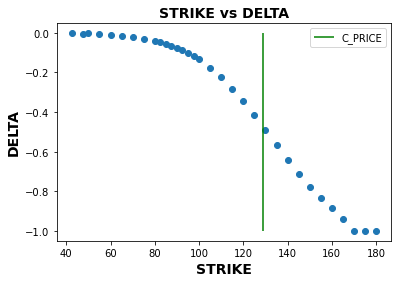

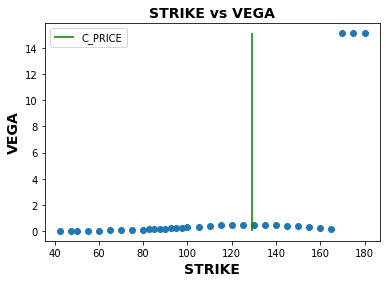

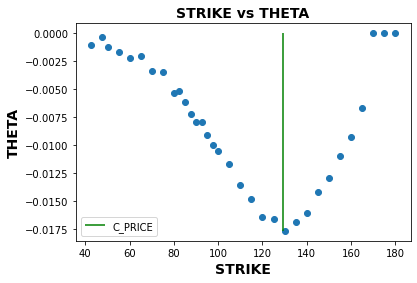

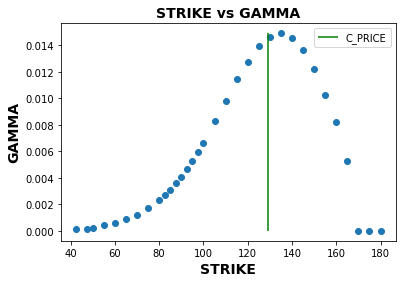

In [19]:
plt.scatter(late_strike, late_pdelta)
plt.vlines(late_last_price,min(late_pdelta), max(late_pdelta), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('DELTA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs DELTA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(late_strike, late_pvega)
plt.vlines(late_last_price,min(late_pvega), max(late_pvega), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('VEGA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs VEGA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(late_strike, late_ptheta)
plt.vlines(late_last_price,min(late_ptheta), max(late_ptheta), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('THETA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs THETA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

plt.scatter(late_strike, late_pgamma)
plt.vlines(late_last_price,min(late_pgamma), max(late_pgamma), color='green', label='C_PRICE')
plt.xlabel('STRIKE', fontsize = 14, fontweight='bold')
plt.ylabel('GAMMA', fontsize = 14, fontweight='bold')
plt.title('STRIKE vs GAMMA', fontsize = 14, fontweight='bold')
plt.legend()
plt.show()

Late dte options seems to follow similar pattern as mid dte but the increment values of the greeks are very small compared to mid and late dte options.

However, delta shared a similar graph as mid dte options meaning the only greek that will make a difference in this option contract is delta.  

# CONCLUSION
- Early dte is very volatile around the current stock price and stable as you go further out of the current price.

- Mid dte is much stable and follows a steady flow which protects option price from sudden changes.

- Late dte greek movement is very minimal and the only greek that will make option price change is delta.

- When the strike price is at a extreme high, greek movements are unpredictable because there is not enough options being traded in that strike price.